根据比电容的定义，我们有
$$C_p=\frac{Q}{V}=\frac{I\Delta t}{m\Delta V} \tag{1}$$
上下同时除以$\Delta t$可以得到
$$C_p=\frac{I}{m(\frac{\Delta V}{\Delta t})} \tag{2}$$
记扫描速率$k=\frac{\Delta V}{\Delta t}$，可以得到
$$C_p=\frac{I}{mk}\tag{3}$$
即
$$I=mkC_p\tag{4}$$
考虑CV曲线从$V_1$到$V_2$的单调过程
$$\int_{V_1}^{V_2}I(V)dV=\int_{V_1}^{V_2}mkC_pdV\tag{5}$$
$m,k,C_p$均为常数，因此
$$\int_{V_1}^{V_2}I(V)dV=(V_2-V_1)mkC_p\tag{6}$$
我们假设$V_2>V_1$。在CV曲线的充电过程中，
$$\int_{V_1}^{V_2}I_{up}(V)dV=(V_2-V_1)mkC_p\tag{7}$$
在放电过程中，
$$\int_{V_2}^{V_1}I_{down}(V)dV=(V_1-V_2)mkC_p\tag{8}$$
因此
$$C_p=\frac{Area}{2(V_2-V_1)mk}\tag{9}$$
其中$Area$是CV曲线围成的面积。

Area: 0.00028671044796750025
比电容Cp= 4.320531162861667 F/g


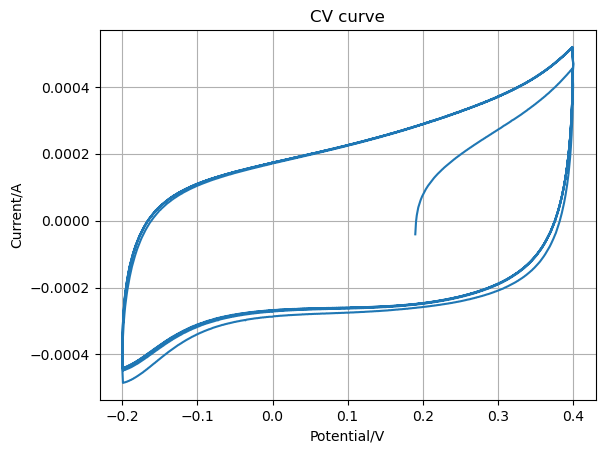

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 每次运行前更改
# m为活性物质的质量，单位为mg
# k为CV扫描的速率，单位为mV/s

m = 5.53
k = 20

coordinates = []

with open('CV.txt', 'r') as file:
    for line in file:
        # 移除行末的换行符并使用逗号分隔符分割行
        parts = line.strip().split(',')
        
        # 确保行包含两个值
        if len(parts) == 2:
            # 将两个值转换为浮点数，并创建坐标点
            try:
                V = float(parts[0])
                I = float(parts[1])
                coordinate = (V, I)
                coordinates.append(coordinate)
            except ValueError:
                print(f"无法解析行：{line}")

# 计算多边形围成的面积
def calculate_polygon_area(coords):
    n = len(coords)
    area = 0

    j = n - 1
    for i in range(0, n):
        area += (coords[j][0] + coords[i][0]) * (coords[j][1] - coords[i][1])
        j = i

    return abs(area / 2)

# coordinates列表包含了每一个坐标(V,I)
# 获取V坐标的最大值
max_first_coordinate = max(coordinates, key=lambda x: x[0])

# 获取所有最大值的索引
max_first_coordinate_indices = [i for i, coord in enumerate(coordinates) if coord[0] == max_first_coordinate[0]]

# 创建一个空列表来存储每个索引范围内的坐标
coordinate_ranges = []

# 使用循环获取每两个索引之间的坐标
for i in range(len(max_first_coordinate_indices) - 1):
    start_index = max_first_coordinate_indices[i]
    end_index = max_first_coordinate_indices[i + 1]
    
    # 使用切片提取坐标并存储在一个变量中
    selected_coordinates = coordinates[start_index:end_index]
    
    # 将坐标添加到列表中
    coordinate_ranges.append(selected_coordinates)

#建立一个数组，储存每一个循环的面积
areas = []

# 计算每个循环的面积
for i, coordinates_range in enumerate(coordinate_ranges):
    area = calculate_polygon_area(coordinates_range)
    areas.append(area)

# 计算循环面积的平均值
final_area = sum(areas)/len(areas)

V_values = [coord[0] for coord in coordinates]
delta_V = max(V_values) - min(V_values)

Cp = final_area * (10**6) /(2 * delta_V * m * k)
print("Area:", final_area)
print("比电容Cp=", Cp, "F/g")

x_coordinates, y_coordinates = zip(*coordinates)

# 创建折线图
plt.plot(x_coordinates, y_coordinates)

# 添加标签和标题
plt.xlabel('Potential/V')
plt.ylabel('Current/A')
plt.title('CV curve')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()